EDA - 1
About - Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df["selling_price"].dtype

dtype('int64')

In [5]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
# What is the range of selling prices in the dataset
selling_price_range = np.max(df["selling_price"]) - np.min(df["selling_price"])
selling_price_range

755000

In [7]:
# What is the median selling price for bikes in the dataset
selling_price_median = np.median(df["selling_price"])
selling_price_median

45000.0

In [8]:
# What is the most common seller type
np.max(df["seller_type"])

'Individual'

In [9]:
# How many bikes have driven more than 50,000 kilometers
bikes_above_50k = df[df['km_driven'] > 50000]
count_above_50k = bikes_above_50k.shape[0]
print("Number of bikes driven more than 50,000 km:", count_above_50k)


Number of bikes driven more than 50,000 km: 170


In [10]:
# What is the average km_driven value for each ownership type
average_km_by_owner = df.groupby('owner')['km_driven'].mean()
average_km_by_owner

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [11]:
#  What proportion of bikes are from the year 2015 or older
older_bikes = df[df['year'] <= 2015]
proportion_older_bikes = len(older_bikes) / len(df)
print(f"Proportion of bikes from the year 2015 or older: {proportion_older_bikes:.2%}")

Proportion of bikes from the year 2015 or older: 56.64%


In [12]:
# What is the trend of missing values across the dataset
missing_values = df.isnull().sum()
missing_proportion = (missing_values / len(df)) * 100
missing_data_trend = pd.DataFrame({
    'Missing Values': missing_values,
    'Proportion (%)': missing_proportion
})

print(missing_data_trend)

                   Missing Values  Proportion (%)
name                            0        0.000000
selling_price                   0        0.000000
year                            0        0.000000
seller_type                     0        0.000000
owner                           0        0.000000
km_driven                       0        0.000000
ex_showroom_price             435       40.999057


In [13]:
# What is the highest ex_showroom_price recorded, and for which bike
max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_price = df[df['ex_showroom_price'] == max_ex_showroom_price]
bike_with_max_price

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [14]:
#  What is the total number of bikes listed by each seller type
bike_count_by_seller = df['seller_type'].value_counts()
bike_count_by_seller


,count
seller_type,
Individual,1055
Dealer,6


In [15]:
# What is the relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
correlation

nan

In [16]:
# Identify and remove outliers in the km_driven column using the IQR methodB
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


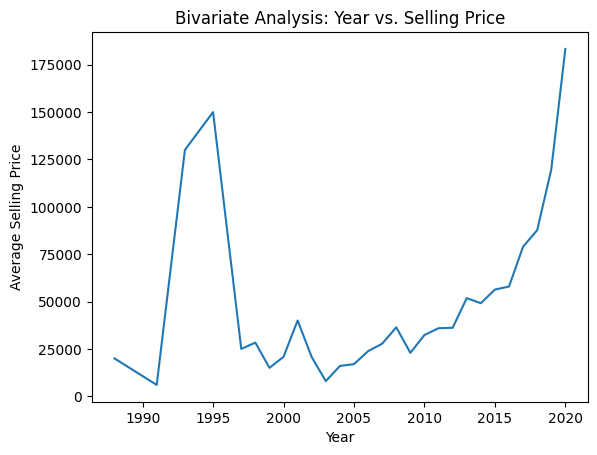

In [18]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price
bivariate_analysis = df.groupby('year')['selling_price'].mean()
plt.plot(bivariate_analysis.index, bivariate_analysis.values)
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.title('Bivariate Analysis: Year vs. Selling Price')
plt.show()

In [19]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing Year)
current_year = 2023
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation = df['depreciation'].mean()
average_depreciation

-28357.655683690282

In [21]:
# Which bike names are priced significantly above the average price for their manufacturing year
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['average_price_year'] = df['year'].map(average_price_by_year)
df['price_difference'] = df['selling_price'] - df['average_price_year']
significant_priced_bikes = df[df['price_difference'] > 2 * df['price_difference'].std()]
significant_priced_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,average_price_year,price_difference
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,15,NaN,36404.000000,143596.000000
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,4,13320.0,119689.511628,245310.488372
130,Royal Enfield Continental GT 650,299000,2019,Individual,1st owner,1500,NaN,4,NaN,119689.511628,179310.488372
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0,10,-528000.0,51802.816901,698197.183099
146,KTM RC 390,180000,2017,Individual,1st owner,3775,NaN,6,NaN,78962.121212,101037.878788
242,KTM RC 390,210000,2017,Individual,1st owner,12000,NaN,6,NaN,78962.121212,131037.878788
261,Royal Enfield Interceptor 650,260000,2019,Individual,1st owner,1200,NaN,4,NaN,119689.511628,140310.488372
288,KTM RC 390,270000,2019,Individual,1st owner,2380,NaN,4,NaN,119689.511628,150310.488372
289,Kawasaki Ninja 650 [2018-2019],425000,2017,Individual,2nd owner,13600,599000.0,6,-174000.0,78962.121212,346037.878788
295,Suzuki GSX S750,760000,2019,Individual,1st owner,2800,752020.0,4,7980.0,119689.511628,640310.488372


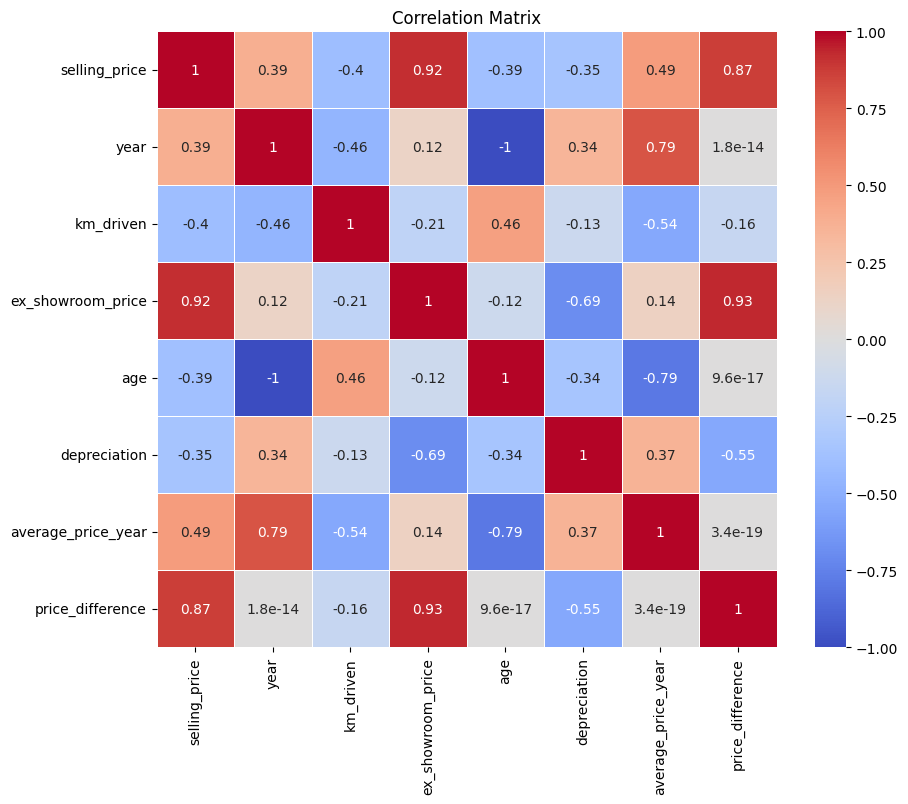

In [22]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()